# 🛳️ Projet Titanic - Prédiction de la survie

Ce notebook suit les étapes du projet :
- Préparation et nettoyage des données
- Analyse non supervisée (PCA, K-Means)
- Apprentissage supervisé (Random Forest)
- Interprétation des résultats et choix des variables

In [64]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. Chargement et exploration des données

In [65]:
# Charger le fichier train.csv (Kaggle)
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# Informations générales sur le dataset
df.info()

# Statistiques descriptives
df.describe()

# Compter les valeurs manquantes
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Nettoyage et préparation des données
    - Objectif : Rendre les données prêtes pour l’analyse : supprimer les colonnes inutiles, traiter les valeurs manquantes, transformer les variables catégorielles.

In [67]:
# Remplacer les âges manquants par la médiane
df['Age'].fillna(df['Age'].median(), inplace=True)

# Remplacer les ports d'embarquement manquants par le plus fréquent
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Supprimer la colonne 'Cabin' (trop de valeurs manquantes)
df.drop(columns=['Cabin'], inplace=True)

# Conversion de 'Sex' en valeur numérique (male = 0, female = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encodage one-hot de 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Supprimer les colonnes peu utiles pour la prédiction
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

C:\Users\Mickael A\AppData\Local\Temp\ipykernel_11180\4257699681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Mickael A\AppData\Local\Temp\ipykernel_11180\4257699681.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

## 3. Analyse non supervisée (PCA + KMeans)
    - Objectif: Explorer les données sans utiliser la variable cible "Survived" pour découvrir des structures cachées (regroupements, tendances).

### 3.1 Réduction de dimensionnalité (PCA)

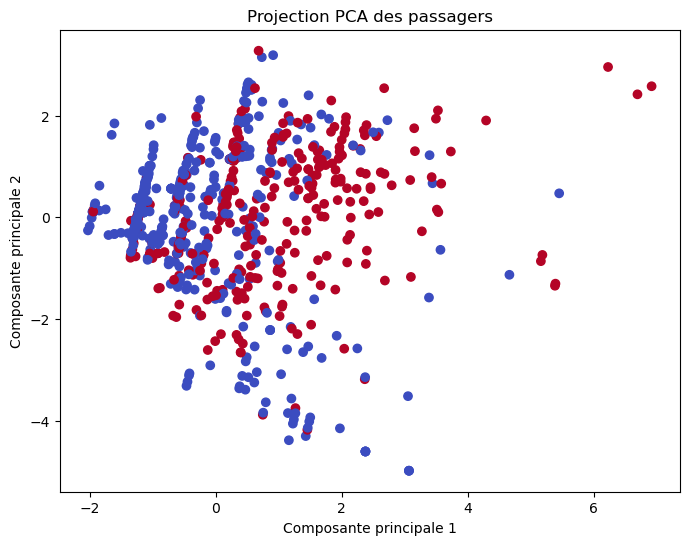

7

In [71]:
# Normaliser les données
features = df.drop('Survived', axis=1)
X_scaled = StandardScaler().fit_transform(features)

# Réduire à n_comp dimensions
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Affichage des données projetées, colorées selon la survie
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Survived'], cmap='coolwarm')
plt.title("Projection PCA des passagers")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()
pca.n_components_

### 3.2 Clustering (K-Means)

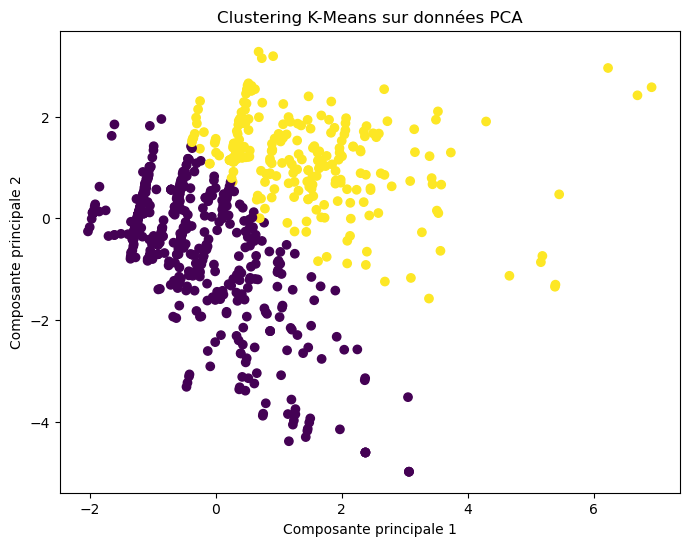

In [81]:
# Appliquer K-Means avec 2 clusters (survivants vs non-survivants)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Afficher les clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.title("Clustering K-Means sur données PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

## 4. Apprentissage supervisé (Random Forest)
    - Objectif : Utiliser un modèle d’apprentissage automatique pour prédire la survie des passagers à partir des données préparées.

### 4.1 Séparation des données

In [73]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  4.2 Entraînement d’un modèle (Random Forest)

In [74]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

### 4.3 Évaluation du modèle

In [75]:
# Matrice de confusion et scores
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 17]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### 4.4 Importance des variables

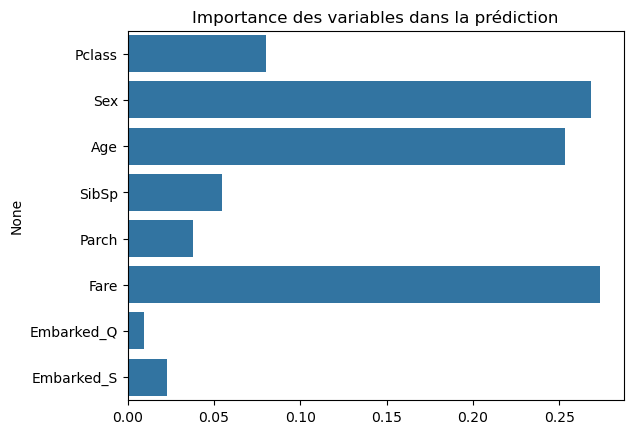

In [76]:
# Importance des variables
importances = model.feature_importances_
features_names = X.columns

sns.barplot(x=importances, y=features_names)
plt.title("Importance des variables dans la prédiction")
plt.show()

## 5. Comparaison aux autres modeles


===== Random Forest =====
Accuracy: 0.8212290502793296
Classification Report:

===== Logistic Regression =====
Accuracy: 0.8100558659217877
Classification Report:

===== K-Nearest Neighbors =====
Accuracy: 0.7150837988826816
Classification Report:


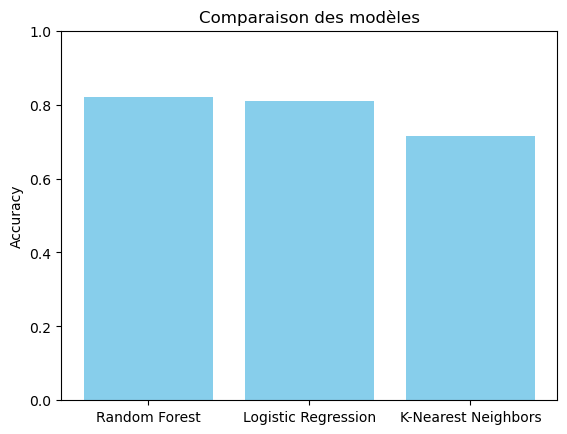

In [77]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    #print(classification_report(y_test, y_pred))


accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Comparaison des modèles")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

## 6. Interpretation
**Interpréter les résultats obtenus:**
- `PCA` : montre que les survivants/non-survivants peuvent être partiellement séparés.
- `Clustering` : retrouve en partie ces groupes, même sans les étiquettes.
- Les `modèles supervisés` atteinnent par exemple `80%-82%` de précision.
- Les variables les plus importantes sont souvent : `Sex`, `Pclass`, `Age`.

**Interprétation du choix des variables**

- `Pclass` : la classe sociale influence les chances de survie.
- `Sex` : les femmes ont eu plus de chances d’être secourues.
- `Age` : les enfants étaient priorisés dans les sauvetages.
- `SibSp` et `Parch` : influence du groupe familial.
- `Fare` : le tarif du billet reflète aussi la classe sociale.
- `Embarked_*` : le port d’embarquement est un indicateur contextuel.

**Variables supprimées** : `Cabin`, `Ticket`, `Name`, `PassengerId` car elles apportaient peu ou étaient difficiles à exploiter.